## Selecting the Right Threshold values using ROC Curve

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# roc curve and auc score
from sklearn.datasets import make_classification

In [27]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [28]:
X.shape

(2000, 20)

In [29]:
y

array([0, 0, 0, ..., 1, 1, 0], shape=(2000,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

## **`Random Forests`**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:, 1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-aur: {}'.format(roc_auc_score(y_test, ytest_pred[:, 1])))

RF train roc-auc: 1.0
RF test roc-aur: 0.9814333333333334


## **`Logistic Regression`**

In [33]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print(f'Logistic train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}')
ytest_pred = log_classifier.predict_proba(X_test)
print(f'Logistic test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


## **`Adaboost Classifier`**

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print(f'Adaboost train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}')
ytest_pred = ada_classifier.predict_proba(X_test)
print(f'Adaboost test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

Adaboost train roc-auc: 0.9926743552432595
Adaboost test roc-auc: 0.9794888888888889


## **`KNN Classifier`**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print(f'Logistic train roc-auc: {roc_auc_score(y_train, ytrain_pred[:, 1])}')
ytest_pred = knn_classifier.predict_proba(X_test)
print(f'Logistic test roc-auc: {roc_auc_score(y_test, ytest_pred[:, 1])}')

Logistic train roc-auc: 0.981670071491109
Logistic test roc-auc: 0.9426111111111111


### **Now we will focus on selecting the best `threashold` for maximum `accuracy`**

In [36]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
final_prediction = pd.concat(pred, axis = 1).mean(axis=1)
print(f'Ensemble test roc-auc: {roc_auc_score(y_test, final_prediction)}')

Ensemble test roc-auc: 0.9844222222222222


In [37]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.99,0.991873,0.669528,1.0
1,0.00,0.000008,0.316455,0.0
2,1.00,0.966763,0.632138,0.8
3,0.97,0.761896,0.533171,0.8
4,0.57,0.779209,0.440650,0.4
...,...,...,...,...
595,0.00,0.024263,0.321128,0.0
596,0.04,0.000003,0.262749,0.0
597,1.00,0.984400,0.605074,1.0
598,0.02,0.001157,0.266081,0.2


In [38]:
final_prediction

0      0.912850
1      0.079116
2      0.849725
3      0.766267
4      0.547465
         ...   
595    0.086348
596    0.075688
597    0.897368
598    0.121810
599    0.862432
Length: 600, dtype: float64

In [39]:
## claculate the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.93189995, 0.91613075, 0.91585577, 0.8277662 ,
       0.82741304, 0.81767435, 0.81658135, 0.80514121, 0.80461355,
       0.7875967 , 0.78587021, 0.7615872 , 0.75945217, 0.73753783,
       0.73609565, 0.6864662 , 0.67997295, 0.61830517, 0.60883457,
       0.57885299, 0.57399768, 0.57080144, 0.56050184, 0.55570879,
       0.554893  , 0.53159348, 0.52595293, 0.46696984, 0.46619513,
       0.44098027, 0.36331505, 0.35292692, 0.33963191, 0.33248471,
       0.22429285, 0.21865762, 0.20110061, 0.19968852, 0.17930347,
       0.17909164, 0.08401333, 0.08377288, 0.05152849])

In [41]:
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction > thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.440980,0.961667
29,0.466195,0.960000
28,0.466970,0.958333
27,0.525953,0.958333
26,0.531593,0.956667


In [42]:
accuracy_ls

,thresholds,accuracy
30,0.440980,0.961667
29,0.466195,0.960000
28,0.466970,0.958333
27,0.525953,0.958333
26,0.531593,0.956667
21,0.573998,0.955000
20,0.578853,0.953333
22,0.570801,0.953333
25,0.554893,0.953333
23,0.560502,0.953333


In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

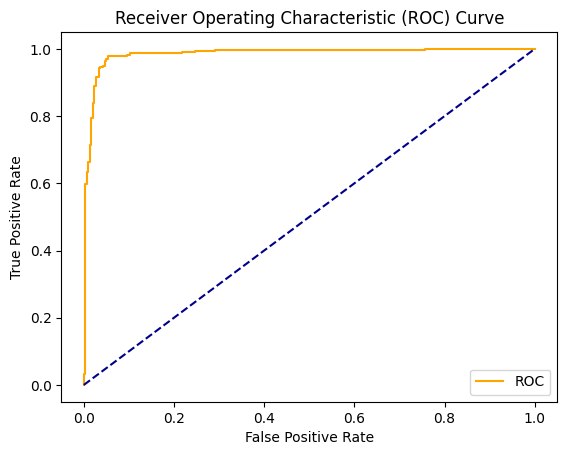

In [44]:
plot_roc_curve(fpr, tpr)